# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 I have selected TMDb Movie database to perform some analysis on the data like,
* What kind of properties are associated with movies that have high revenues? 
* Do big budget movies have better revenue than low budget movies? 
* Do the director have some influence on it's popularity or revenue?

All those questions are to be answered from doing a simple data analysis.

In [5]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [6]:
# loading data
df = pd.read_csv('tmdb-movies.csv')

In [7]:
# looking into the data
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [8]:
# checking null values, data types etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [9]:
# more view about the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning (Replace this with more specific notes!)

I am about to check for inappropriate columns that are not going to be necessary for this analysis.

In [10]:
# checking inappropriate columns
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


Columns such as id, imdb_id, homepage etc are not needed for this analysis. 

In [11]:
# dropping columns that are not necessary
df.drop(['id','imdb_id','cast','homepage','tagline','overview','runtime','production_companies','release_date','budget_adj','revenue_adj','keywords'], axis=1, inplace=True)

In [12]:
# checking the columns again
df.head(1)

,popularity,budget,revenue,original_title,director,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015


In [13]:
# checking for NaN values and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 636.7+ KB


There are two columns with some NaN values namely director and genres. These can be dropped since the number of missing values are negligible.

In [14]:
# dropping NaN values
df.dropna(inplace=True)

In [15]:
# checking NaN once again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10801 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10801 non-null float64
budget            10801 non-null int64
revenue           10801 non-null int64
original_title    10801 non-null object
director          10801 non-null object
genres            10801 non-null object
vote_count        10801 non-null int64
vote_average      10801 non-null float64
release_year      10801 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 717.3+ KB


In [16]:
# checking for duplicate values
sum(df.duplicated())

1

In [17]:
# dropping the duplicate entry
df.drop_duplicates(inplace=True)

In [18]:
df.head(2)

,popularity,budget,revenue,original_title,director,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015


Cleaning is now complete.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Do higher buget leads to higher income?

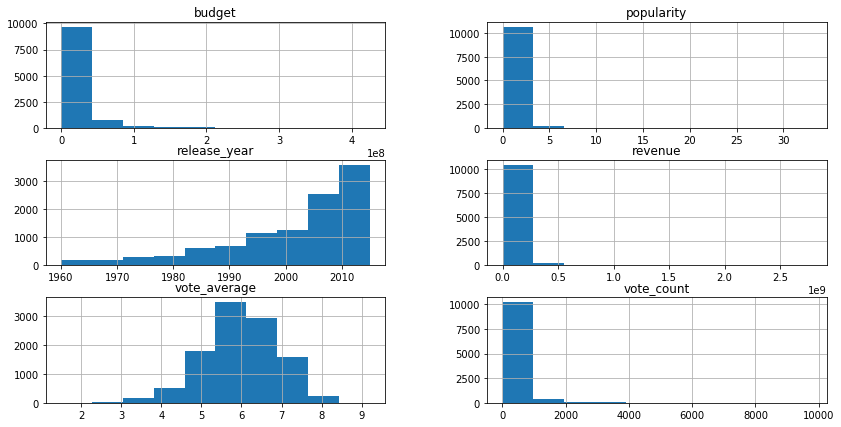

In [19]:
# looking into the overall histogram
df.hist(figsize=(14,7));

It seems that the release year is negatively skewed whereas budget, popularity, revenue are all positively skewed.

#### Checking for the relation between Budget and Revenue.

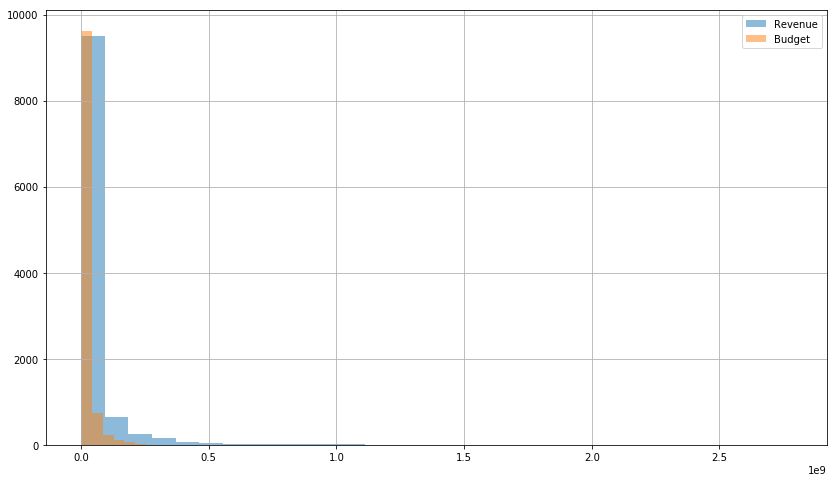

In [20]:
# plotting a histogram for revenue and budget.
df['revenue'].hist(label='Revenue', bins=30, alpha=0.5, figsize=(14,8));
df['budget'].hist(label='Budget', bins=10, alpha=0.5, figsize=(14,8));
plt.legend();

There seems to be a higher revenue for most of the high budget movies.

### Research Question 2: Do the director has an impact on it's revenue?

I am checking the total revenue generated by each director to find whether revenue is based on who directs the movie.

In [22]:
# let's include a function to make reuse of code
def groupFun(value):
    return df.groupby(value).revenue.sum()

In [23]:
# grouping by director on total revenue of each director
a = groupFun('director')

In [24]:
# sorting values to know the top 5 directors who made the most revenue
a.sort_values(ascending=False).head()

director
Steven Spielberg     9018563772
Peter Jackson        6523244659
James Cameron        5841894863
Michael Bay          4917208171
Christopher Nolan    4167548502
Name: revenue, dtype: int64

Steven Spielberg has earned the maximum revenue.

In [25]:
# Displaying the genre on which steven spielberg has directed most movies.
df.loc[df['director'] == 'Steven Spielberg'].genres.value_counts()

Adventure|Action                             4
Drama|History|War                            3
Drama|War                                    2
Action|Thriller|Science Fiction|Mystery      1
Adventure|Animation|Action|Family|Mystery    1
Horror|Thriller|Adventure                    1
Thriller|Drama                               1
Drama                                        1
Adventure|Thriller|Science Fiction           1
Adventure|Science Fiction                    1
Drama|Crime                                  1
Comedy|Drama                                 1
Fantasy|Drama|Romance                        1
Adventure|Action|Science Fiction             1
Action|Crime|Drama                           1
Science Fiction|Drama                        1
Adventure|Fantasy|Comedy|Family              1
Drama|History|Mystery                        1
Action|Comedy                                1
Drama|Science Fiction|Adventure              1
Science Fiction|Adventure|Family|Fantasy     1
Drama|Action|

Most of his movies were based on Action|Adventure|Drama genre.

#### Checking which genres made the most revenue.

In [26]:
# grouping by genres on total revenue sorted in descending order
groupFun('genres').sort_values(ascending=False).head(10)

genres
Comedy                              20323889661
Drama                               15107533347
Comedy|Romance                      11545724341
Adventure|Fantasy|Action             7597483556
Comedy|Drama|Romance                 7251175696
Drama|Romance                        6798112125
Animation|Family                     6701726154
Action|Adventure|Science Fiction     6420484308
Adventure|Fantasy|Family             6079516484
Adventure|Action|Science Fiction     5256276988
Name: revenue, dtype: int64

It seems that Comedy genre has earned the most.

#### Now let's check whether the top directors have made most on the comedy genre.

In [29]:
# filtering out comedy genre and grouping it by director on total revenue from max to min.
df.loc[df['genres'] == 'Comedy'].groupby('director').revenue.sum().sort_values(ascending=False).head(10)

director
Todd Phillips                    1162782026
Dennis Dugan                      709293354
Adam McKay                        555297022
Keenen Ivory Wayans               532326924
Bobby Farrelly|Peter Farrelly     494435447
Larry Charles                     440952277
Nicholas Stoller                  412096807
David Zucker                      405963127
Sean Anders                       405064116
Roger Michell                     363889678
Name: revenue, dtype: int64

And Todd Phillips have earned more revenue in comedy genre than other top directors. Also Steven Spielberg who earned the maximum revenue among other directors has made only one movie on the comedy genre.

#### Now let's compare the revenue earned by top director with the top genre to decide whether directors have a greater influence in the revenue than the genres.

In [30]:
# getting the max revenue earned by top director
director_rev = groupFun('director').max()

In [31]:
# getting the max revenue earned by top genre
genre_rev = groupFun('genres').max()

In [32]:
# displayin the max
max(director_rev,genre_rev)

20323889661

So even though some directors has an impact on the revenue, most of the revenue is dependent on the genre of movie.

#### Let's do some more visualizations on other factors.

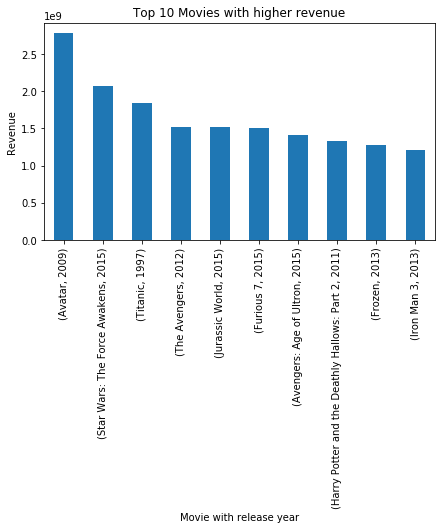

In [34]:
# displaying top ten movies which generated max revenue
top_movies = groupFun(['original_title','release_year']).sort_values(ascending=False).head(10).plot(kind='bar', figsize=(7,4));
top_movies.set_title('Top 10 Movies with higher revenue');
top_movies.set_xlabel('Movie with release year');
top_movies.set_ylabel('Revenue');

The top 10 movies which generated maximum revenue were released after 2008 with Titanic as an outlier which was released on 1997.

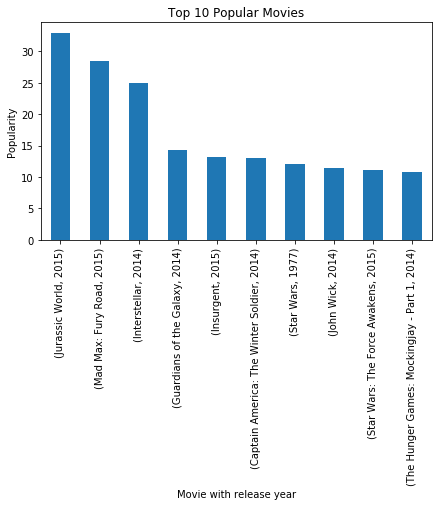

In [35]:
# displaying top ten movies which are more popular
popular_movies = df.groupby(['original_title','release_year']).popularity.sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(7,4));
popular_movies.set_title('Top 10 Popular Movies');
popular_movies.set_xlabel('Movie with release year');
popular_movies.set_ylabel('Popularity');

The top 10 popular movies were released after 2010 with Star Wars as an outlier. From the above two bar charts,
* Most of the top 10 high revenue generated movies did not fall under top 10 popular movies.
* Jurassic World is the only one which fell under both the top 10 popular and high revenue generated movies.

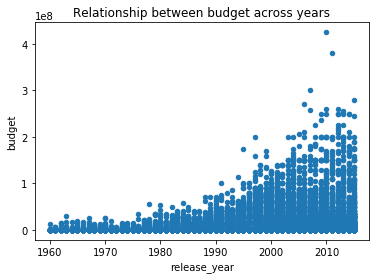

In [44]:
# scatter plot to find the relationship between release year and budget
budgetYear = df.plot(x='release_year', y='budget', kind='scatter');
budgetYear.set_title('Relationship between budget across years');

It seems that the budget increases with year.

<a id='conclusions'></a>
## Conclusions

#### Limitations:
* Dataset contained some NaN values which were cleaned.

From the Exploratory data analysis,
* Most of the high budget movies earned a higher revenue.
* Steven Spielberg has earned more revenue than other directors.
* Most of the Steven Spielberg movies are based on Adventure|Action genre.
* Comedy genre earned the most revenue among other genres.
* Todd Phillips made the most revenue in Comedy genre.
* Even though Steven Spielberg has earned the maximum revenue but he has more movies under Action|Adventure genre than Comedy genre.
* Genre has more impact on revenue than director since the max revenue earned by a genre(Comedy) is higher than the max revenue earned by a director(Steven Spielberg)